In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import KFold,GridSearchCV

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'xgboost'

In [3]:
# Reading Data
Data = pd.read_csv('zomato.csv')
display(Data)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [4]:
display(Data.shape)


(51717, 17)

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
print(Data.isna().sum())

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64


In [7]:
# Dropping the column like "phone" and "url" then create data set "df"
df=Data.drop(['url','phone','address','reviews_list'],axis=1)

In [8]:
df.duplicated().sum()

87

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
display(df)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,NaN,Continental,"1,500",[],Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,600,[],Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,"2,000",[],Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500",[],Pubs and bars,Whitefield


In [12]:
df.dropna(how='any',inplace=True)
display(df.isna().sum())

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [13]:
display(df)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51705,Izakaya Gastro Pub,Yes,Yes,3.8 /5,128,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean","1,200",[],Pubs and bars,Whitefield
51707,M Bar - Bengaluru Marriott Hotel Whitefield,No,No,3.9 /5,77,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,"2,000",[],Pubs and bars,Whitefield
51708,Keys Cafe - Keys Hotel,No,No,2.8 /5,161,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian","1,200",[],Pubs and bars,Whitefield
51711,Bhagini,No,No,2.5 /5,81,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,[],Pubs and bars,Whitefield


In [14]:
display(df.columns)

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [15]:
df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type', 'listed_in(city)':'city'})

In [16]:
display(df.columns)

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'cost', 'menu_item', 'type',
       'city'],
      dtype='object')

In [17]:
display(df.nunique())

name            3174
online_order       2
book_table         2
rate              63
votes           2303
location          88
rest_type         73
dish_liked      5238
cuisines        1691
cost              57
menu_item       5069
type               7
city              30
dtype: int64

In [18]:
for i in df.columns:
    print(f'{i} --> {df[i].unique()}\n')

name --> ['Jalsa' 'Spice Elephant' 'San Churro Cafe' ... 'Tuk-Tuk'
 'Chime - Sheraton Grand Bengaluru Whitefield Hotel &...' 'Fujian Express']

online_order --> ['Yes' 'No']

book_table --> ['Yes' 'No']

rate --> ['4.1/5' '3.8/5' '3.7/5' '4.6/5' '4.0/5' '4.2/5' '3.9/5' '3.0/5' '3.6/5'
 '2.8/5' '4.4/5' '3.1/5' '4.3/5' '2.6/5' '3.3/5' '3.5/5' '3.8 /5' '3.2/5'
 '4.5/5' '2.5/5' '2.9/5' '3.4/5' '2.7/5' '4.7/5' 'NEW' '2.4/5' '2.2/5'
 '2.3/5' '4.8/5' '3.9 /5' '4.2 /5' '4.0 /5' '4.1 /5' '2.9 /5' '2.7 /5'
 '2.5 /5' '2.6 /5' '4.5 /5' '4.3 /5' '3.7 /5' '4.4 /5' '4.9/5' '2.1/5'
 '2.0/5' '1.8/5' '3.4 /5' '3.6 /5' '3.3 /5' '4.6 /5' '4.9 /5' '3.2 /5'
 '3.0 /5' '2.8 /5' '3.5 /5' '3.1 /5' '4.8 /5' '2.3 /5' '4.7 /5' '2.4 /5'
 '2.1 /5' '2.2 /5' '2.0 /5' '1.8 /5']

votes --> [ 775  787  918 ... 4957 2382  843]

location --> ['Banashankari' 'Basavanagudi' 'Jayanagar' 'Kumaraswamy Layout'
 'Rajarajeshwari Nagar' 'Mysore Road' 'Uttarahalli' 'South Bangalore'
 'Vijay Nagar' 'Bannerghatta Road' 'JP Nagar' 'BTM

In [19]:
# Remove the comma separator in the number that can cause problem during scaling. 
df['cost'] = df['cost'].apply(lambda x: x.replace(',' , '')) #Using lambda function to replace ',' with nothing in the cost

In [20]:
# Change the data type from string to float
df['cost'] = df['cost'].astype(float)

In [21]:
df['cost'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        750.,  200.,  850., 1200.,  150.,  350.,  250., 1500., 1300.,
       1000.,  100.,  900., 1100., 1600.,  950.,  230., 1700., 1400.,
       1350., 2200., 2000., 1800., 1900.,  180.,  330., 2500., 2100.,
       3000., 2800., 3400.,   40., 1250., 3500., 4000., 2400., 1450.,
       3200., 6000., 1050., 4100., 2300.,  120., 2600., 5000., 3700.,
       1650., 2700., 4500.])

In [22]:
# Get Unique Values from Rate column 
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [23]:
display(df['rate'].value_counts().head(60))

3.9/5     1690
3.9 /5    1555
4.0/5     1475
4.0 /5    1426
4.1/5     1416
4.1 /5    1410
3.8/5     1332
3.8 /5    1151
4.2 /5    1122
4.2/5     1000
4.3 /5     907
3.7/5      874
3.7 /5     771
4.3/5      770
4.4 /5     622
4.4/5      513
3.6/5      447
3.6 /5     431
4.5 /5     403
3.5/5      260
4.5/5      242
3.5 /5     222
3.4 /5     185
3.0/5      185
2.9/5      174
4.6 /5     174
3.4/5      166
2.8 /5     163
3.1/5      163
2.8/5      158
NEW        146
3.1 /5     144
2.9 /5     138
3.2/5      137
3.3/5      127
4.6/5      125
3.2 /5     113
3.0 /5     106
2.7/5      105
3.3 /5      92
4.7 /5      86
2.7 /5      85
4.7/5       81
2.6/5       77
2.6 /5      61
4.8 /5      43
2.5 /5      32
4.9 /5      30
2.4/5       30
2.5/5       25
4.9/5       25
2.3/5       25
2.4 /5      24
4.8/5       23
2.3 /5      20
2.2/5       19
2.1 /5      13
2.1/5       11
2.0 /5       7
2.2 /5       7
Name: rate, dtype: int64

In [24]:
df[df['rate'] == 'NEW'].value_counts().sum()

146

In [25]:
# There is one Unique value "NEW",we can assume that might newly open resturant so we are removing form dataset
df = df.loc[df.rate !='NEW'] 
display(df)


,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,menu_item,type,city
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51705,Izakaya Gastro Pub,Yes,Yes,3.8 /5,128,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean",1200.0,[],Pubs and bars,Whitefield
51707,M Bar - Bengaluru Marriott Hotel Whitefield,No,No,3.9 /5,77,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,2000.0,[],Pubs and bars,Whitefield
51708,Keys Cafe - Keys Hotel,No,No,2.8 /5,161,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian",1200.0,[],Pubs and bars,Whitefield
51711,Bhagini,No,No,2.5 /5,81,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800.0,[],Pubs and bars,Whitefield


In [26]:
display (df['rate']. unique())

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '4.8/5',
       '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5', '2.7 /5',
       '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5', '4.4 /5',
       '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5', '3.3 /5',
       '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5', '3.5 /5',
       '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [27]:
df['rate'] = df['rate'].apply(lambda x:x.replace('/5',''))
df['rate'].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

### Visulation of Data

In [28]:
df['name'].value_counts()

Onesta               85
Empire Restaurant    67
KFC                  59
McDonald's           57
Pizza Hut            56
                     ..
Lucky Singh & Co      1
Fujian Express        1
4700BC Popcorn        1
Ginger                1
Mc Donald's           1
Name: name, Length: 3157, dtype: int64

In [29]:
df['name'].value_counts().head(60)

Onesta                         85
Empire Restaurant              67
KFC                            59
McDonald's                     57
Pizza Hut                      56
Domino's Pizza                 55
Faasos                         54
Smally's Resto Cafe            54
Corner House Ice Cream         52
Burger King                    51
Polar Bear                     48
Mani's Dum Biryani             47
Smoor                          47
Pizza Stop                     46
Mainland China                 45
Subway                         45
Chung Wah                      45
Lakeview Milkbar               44
Hammered                       44
eat.fit                        44
Beijing Bites                  43
Truffles                       43
Leon Grill                     42
Petoo                          42
Krispy Kreme                   41
Chai Point                     41
Oye Amritsar                   41
Natural Ice Cream              40
Biggies Burger 'n' More        39
Barbeque Natio

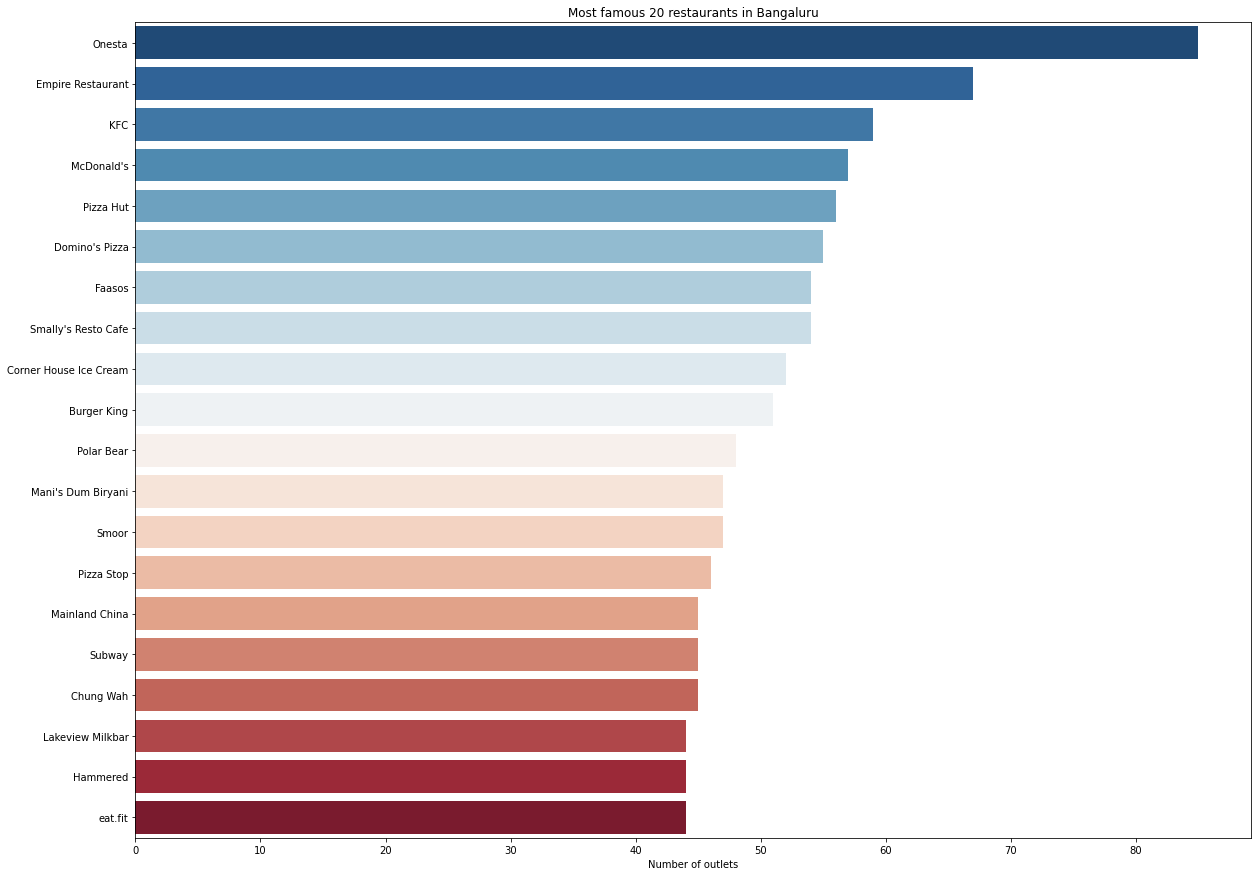

In [30]:
# Bar chat with Top 20 restaurants
plt.figure(figsize=(20,15))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='RdBu_r');
plt.title("Most famous 20 restaurants in Bangaluru")
plt.xlabel("Number of outlets")
plt.show()

In [31]:
# Restaurants with Table Booking 
display(df['book_table'].value_counts())


No     17186
Yes     6041
Name: book_table, dtype: int64

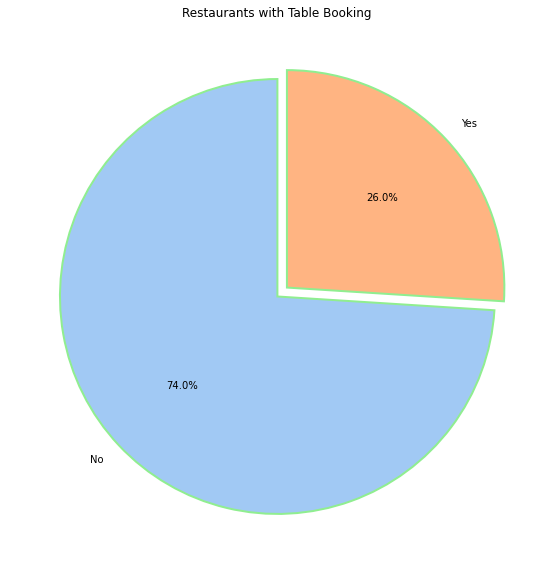

In [32]:
plt.figure(figsize=(15,10))
x=df['book_table'].value_counts()
colors = sns.color_palette('pastel')[0:3]
wp = { 'linewidth' : 2, 'edgecolor' : "lightgreen" }
plt.pie(x, labels = x.index, colors = colors, autopct='%.1f%%',startangle = 90,explode = [0.01,0.05],wedgeprops = wp)
plt.title("Restaurants with Table Booking ")
plt.show()

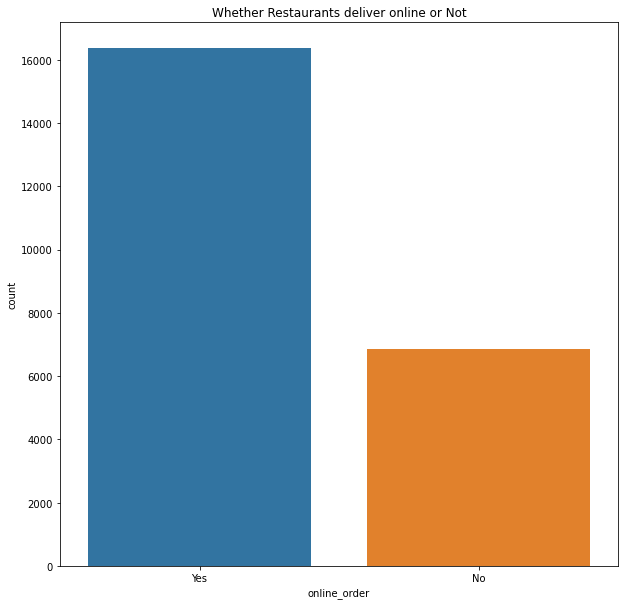

In [33]:
# Restaurants with Delivering online or not
sns.countplot(df['online_order'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Whether Restaurants deliver online or Not')
plt.show() 


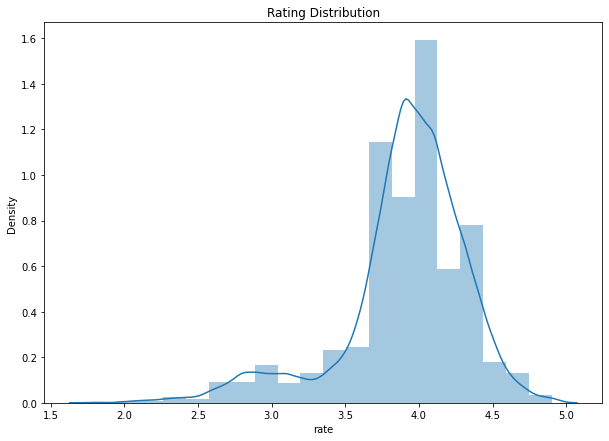

In [34]:
# Rating Distribution
plt.figure(figsize=(10,7))
sns.distplot(df['rate'],bins=20);
plt.title('Rating Distribution');


In [35]:
display (df['rate'].min())

'1.8'

In [36]:
display (df['rate'].max())

'4.9 '

In [37]:
df['rate']=df['rate'].astype(float)
l1 = sorted(df['rate'].unique())
print(list(l1))


[1.8, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]


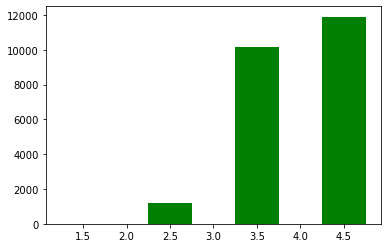

In [38]:
group= [1,2,3,4,5]
plt.hist (df['rate'],group,histtype = 'bar',rwidth =0.5,color = 'g')
plt.show()


In [39]:
# Number of Restaurants with Rating Between 1 and 2
grp_1to2=((df['rate']>=1) & (df['rate']<2)).sum()
display (grp_1to2)

5

In [40]:
# Number of Restaurants with Rating Between 2 and 3
grp_2to3=((df['rate']>=2) & (df['rate']<3)).sum()
display (grp_2to3)

1178

In [41]:
# Number of Restaurants with Rating Between 3 and 4
grp_3to4=((df['rate']>=3) & (df['rate']<4)).sum()
display (grp_3to4)

10151

In [42]:
# Number of Restaurants with Rating Between 4 and 5
grp_4to5=((df['rate']>=4) & (df['rate']<5)).sum()
display (grp_4to5)

11893

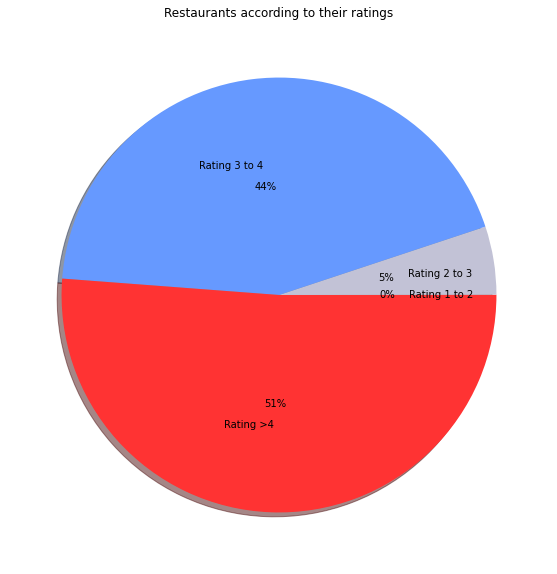

In [43]:
# Create a Pie Chart with Rating 
rate = [grp_1to2,grp_2to3,grp_3to4,grp_4to5]
labels = ['Rating 1 to 2','Rating 2 to 3','Rating 3 to 4','Rating >4']
colors = ['#ff3333','#c2c2d6','#6699ff']
plt.pie(rate,colors=colors,labels=labels,autopct='%1.0f%%',pctdistance=.5,labeldistance=0.6,shadow=True);
fig=plt.gcf();
plt.title('Restaurants according to their ratings');
fig.set_size_inches(10,10)
plt.show();

In [44]:
#Count distinct Value by service Types 
display(df['type'].value_counts())

Delivery              10649
Dine-out               8003
Desserts               1364
Cafes                  1066
Drinks & nightlife      872
Buffet                  752
Pubs and bars           521
Name: type, dtype: int64

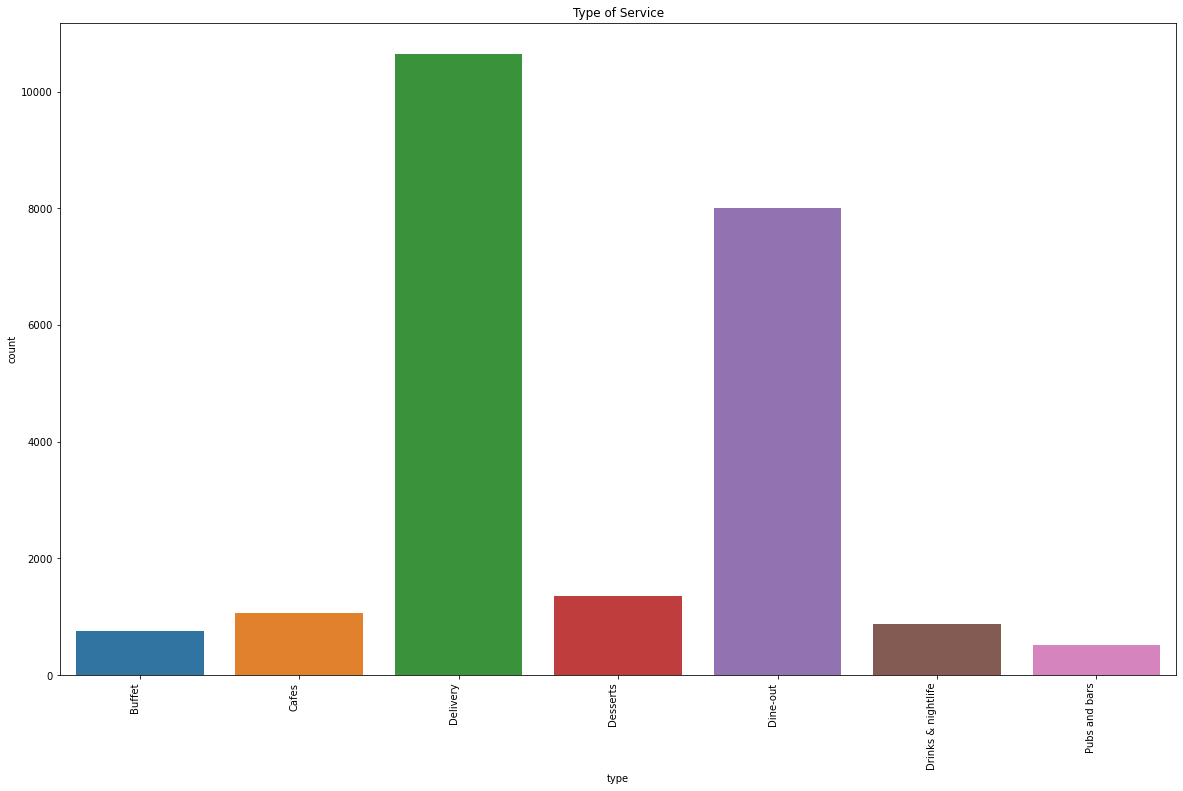

In [45]:
# Here the two main service types are Delivery and Dine-out
sns.countplot(df['type']).set_xticklabels(sns.countplot(df['type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(20,12)
plt.title('Type of Service')
plt.show()


In [46]:
# Number of Restaurants in each group 
df.groupby('cost').size()


cost
40.0         8
100.0      120
120.0        2
150.0      371
180.0       17
200.0      869
230.0       10
250.0      696
300.0     1687
330.0        4
350.0      553
400.0     2478
450.0      719
500.0     2321
550.0      439
600.0     2167
650.0      644
700.0     1202
750.0      651
800.0     1646
850.0      122
900.0      523
950.0       47
1000.0    1217
1050.0       4
1100.0     450
1200.0     901
1250.0       8
1300.0     495
1350.0      18
1400.0     445
1450.0       5
1500.0     837
1600.0     236
1650.0       6
1700.0     228
1800.0     193
1900.0      57
2000.0     297
2100.0      60
2200.0      39
2300.0       1
2400.0      22
2500.0     142
2600.0       4
2700.0       2
2800.0      31
3000.0     159
3200.0       2
3400.0      13
3500.0      25
3700.0       1
4000.0      24
4100.0       4
4500.0       2
5000.0       1
6000.0       2
dtype: int64

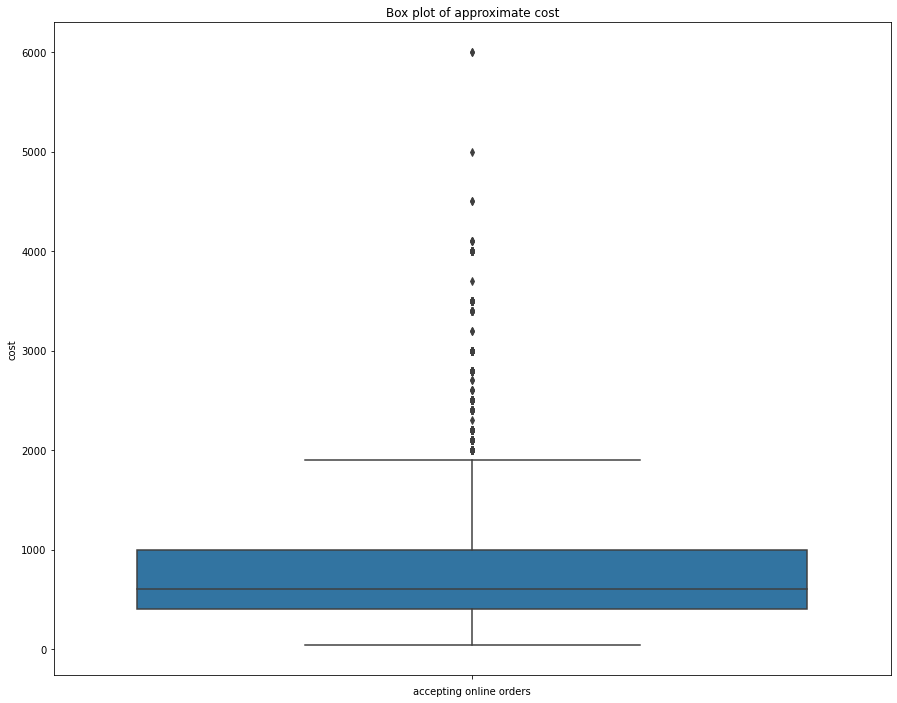

In [47]:
fig = plt.gcf()
fig.set_size_inches(15,12)
sns.boxplot(y=df['cost'],data=df);
plt.title("Box plot of approximate cost");
plt.xlabel('accepting online orders');

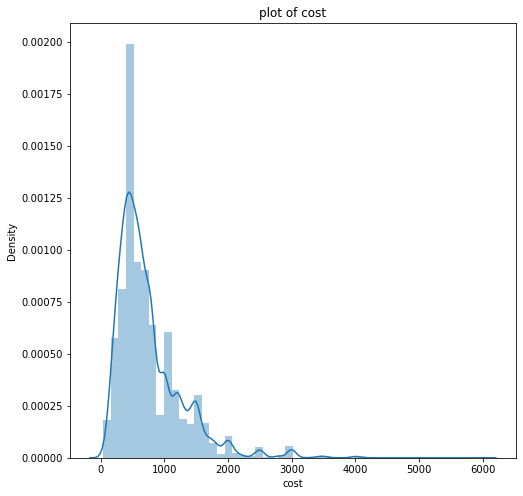

In [48]:
# Dist plot of cost for the cost
plt.figure(figsize=(8,8))
sns.distplot(df['cost']);
plt.title('plot of cost')
plt.show()


In [71]:
# Extract the favourite food from column – dish_liked
import re
df.index=range(df.shape[0])
menu=[]
for i in range(df.shape[0]):
    array_split=re.split(',',df['dish_liked'][i])
    for item in array_split:
        menu.append(item)


In [72]:
display (f'Number of dishes -- {len(menu)} --> {menu}')

"Number of dishes -- 126706 --> ['Pasta', ' Lunch Buffet', ' Masala Papad', ' Paneer Lajawab', ' Tomato Shorba', ' Dum Biryani', ' Sweet Corn Soup', 'Momos', ' Lunch Buffet', ' Chocolate Nirvana', ' Thai Green Curry', ' Paneer Tikka', ' Dum Biryani', ' Chicken Biryani', 'Churros', ' Cannelloni', ' Minestrone Soup', ' Hot Chocolate', ' Pink Sauce Pasta', ' Salsa', ' Veg Supreme Pizza', 'Masala Dosa', 'Panipuri', ' Gol Gappe', 'Onion Rings', ' Pasta', ' Kadhai Paneer', ' Salads', ' Salad', ' Roti', ' Jeera Rice', 'Farmhouse Pizza', ' Chocolate Banana', ' Virgin Mojito', ' Pasta', ' Paneer Tikka', ' Lime Soda', ' Prawn Pizza', 'Pizza', ' Mocktails', ' Coffee', ' Nachos', ' Salad', ' Pasta', ' Sandwiches', 'Waffles', ' Pasta', ' Coleslaw Sandwich', ' Choco Waffle', ' Tacos', ' Momos', ' Cheese Nachos', 'Waffles', ' Pasta', ' Crispy Chicken', ' Honey Chilli Chicken', ' Sandwich', ' Coffee', ' Crepe', 'Mocktails', ' Peri Fries', ' Lasagne', ' Pizza', ' Chicken Bbq Wings', ' Virgin Mojito', '

In [73]:
print("*** Count of Most liked dishes ***")
favourite_food = pd.Series(menu).value_counts()
display(favourite_food.head(30))


*** Count of Most liked dishes ***


 Pasta              2687
 Pizza              1909
 Cocktails          1871
 Burgers            1734
 Mocktails          1615
 Biryani            1306
 Sandwiches         1287
Burgers             1255
 Coffee             1184
 Nachos             1167
 Fish               1115
 Paratha            1107
 Salads             1053
 Chicken Biryani    1004
Cocktails            887
 Fries               876
 Noodles             854
 Beer                835
 Mutton Biryani      832
 Tea                 818
Coffee               801
 Sandwich            787
 Butter Chicken      782
 Thali               770
Biryani              748
Pizza                746
 Roti                728
 Brownie             726
 Salad               676
 Hot Chocolate       670
dtype: int64

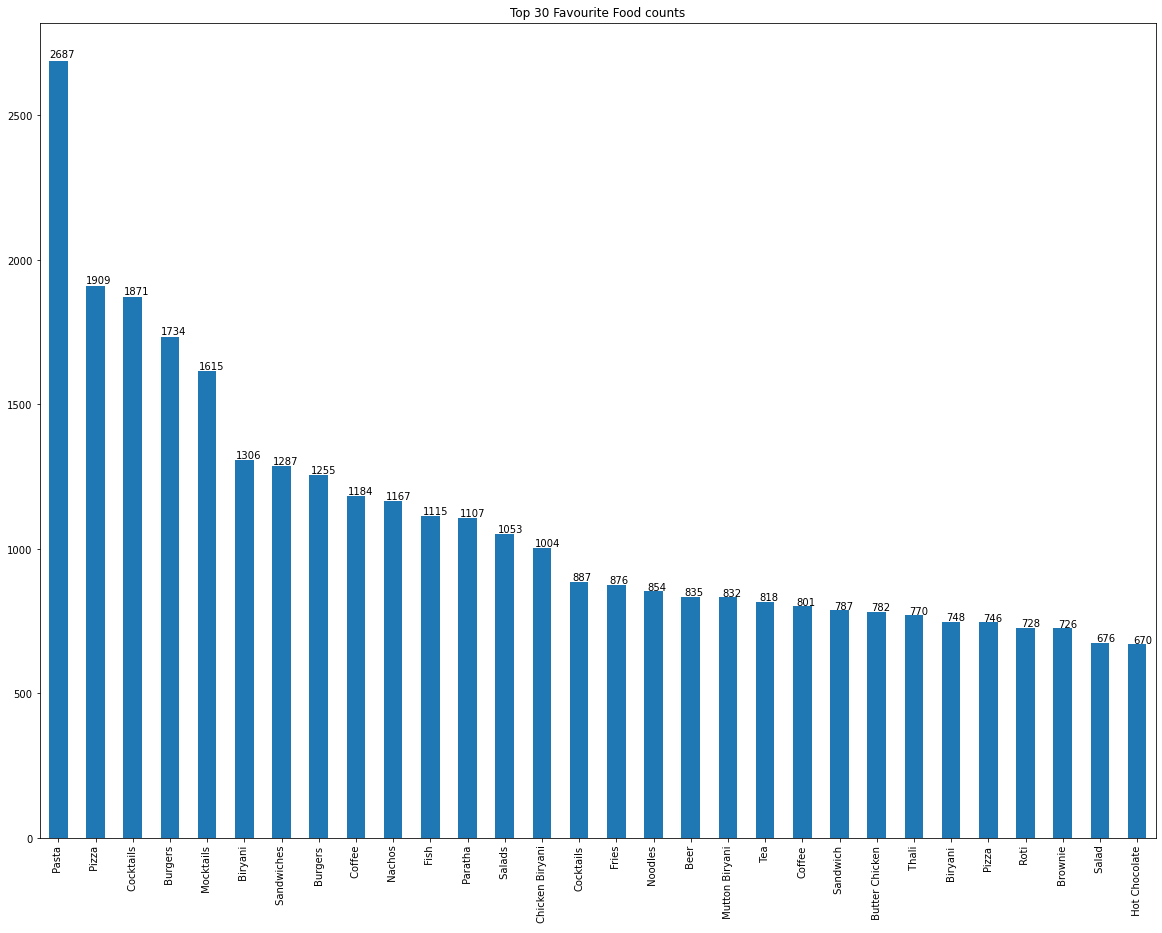

In [80]:
# Create Bar Graph with top 30 dishes 
ax = favourite_food.nlargest(n=30, keep='first').plot(kind='bar',figsize=(20,15),title = 'Top 30 Favourite Food counts')
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() * 1.005, i.get_height() * 1.005))


In [82]:
# Restaurant Type and Count 
df['rest_type'].value_counts().head(60)

Casual Dining                    7321
Quick Bites                      5249
Cafe                             2373
Dessert Parlor                   1083
Casual Dining, Bar                981
Delivery                          704
Bar                               358
Takeaway, Delivery                341
Bar, Casual Dining                333
Pub                               323
Fine Dining                       311
Casual Dining, Cafe               304
Lounge                            298
Pub, Casual Dining                224
Food Court                        220
Bakery                            166
Cafe, Casual Dining               159
Dessert Parlor, Cafe              143
Beverage Shop                     137
Beverage Shop, Quick Bites        137
Cafe, Bakery                      128
Casual Dining, Pub                124
Microbrewery, Casual Dining       119
Cafe, Dessert Parlor              111
Sweet Shop                        105
Bakery, Quick Bites                96
Sweet Shop, 

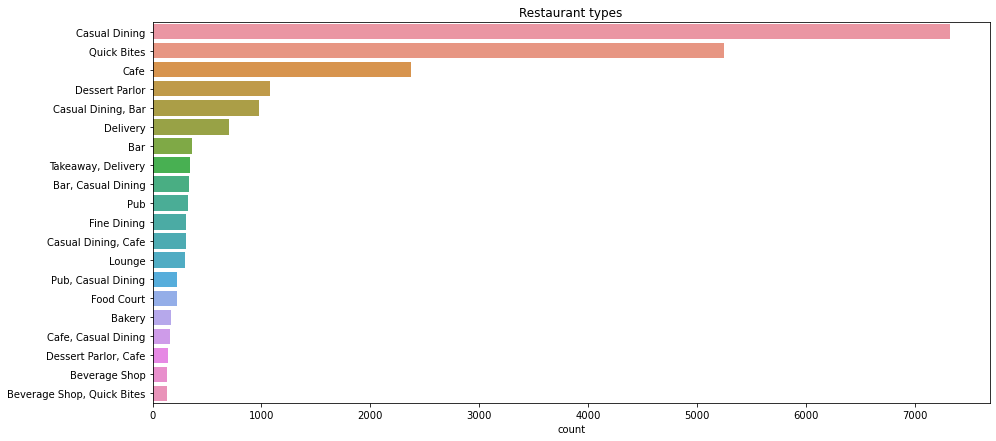

In [102]:
# Casual Dining, Quick Bites and Cafe are the 3 most common types of Restaurants
plt.figure(figsize=(15,7))
rest=df['rest_type'].value_counts()[:20]
sns.barplot(rest,rest.index);
plt.title("Restaurant types")
plt.xlabel("count");
plt.show();

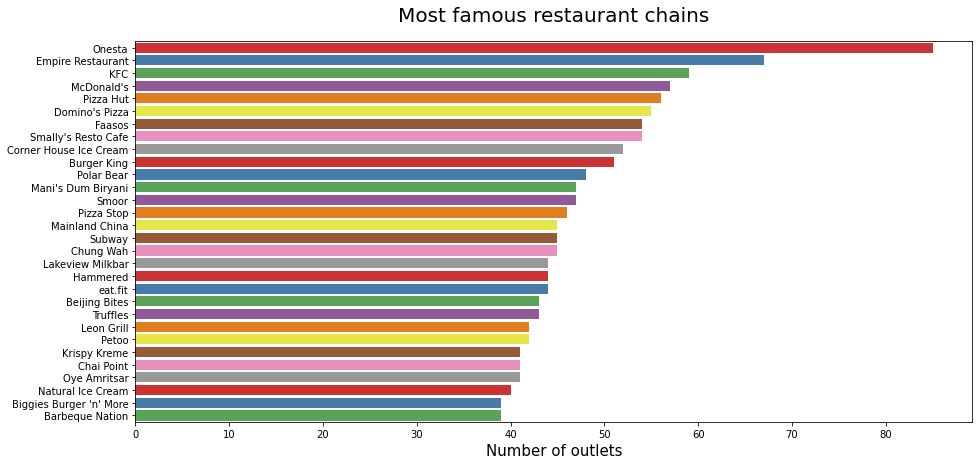

In [104]:
# Famous Restaurants 
# here we can find most famous restaurant as onesta,Empire,Kfc,Mcdonal,pizza hut,dominos.
plt.figure(figsize=(15,7))
chains=df['name'].value_counts()[:30]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)
plt.show()


### Model creation

In [105]:
display(df.head())

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,menu_item,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,[],Buffet,Banashankari


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23227 entries, 0 to 23226
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          23227 non-null  object 
 1   online_order  23227 non-null  object 
 2   book_table    23227 non-null  object 
 3   rate          23227 non-null  float64
 4   votes         23227 non-null  int64  
 5   location      23227 non-null  object 
 6   rest_type     23227 non-null  object 
 7   dish_liked    23227 non-null  object 
 8   cuisines      23227 non-null  object 
 9   cost          23227 non-null  float64
 10  menu_item     23227 non-null  object 
 11  type          23227 non-null  object 
 12  city          23227 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [109]:
# Convert the online categorical variables into a numeric format
df.online_order[df.online_order == 'Yes'] = 1
df.online_order[df.online_order == 'No'] = 0

In [110]:
# Display number of records in each category
df.online_order.value_counts()

1    16366
0     6861
Name: online_order, dtype: int64

In [114]:
df.online_order = pd.to_numeric(df.online_order)

In [113]:
# Update Column book_table to 1 and 0 
df.book_table[df.book_table == 'Yes'] = 1
df.book_table[df.book_table == 'No'] = 0

In [115]:
# #change the string categorical into to a categorical int
df.book_table = pd.to_numeric(df.book_table)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23227 entries, 0 to 23226
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          23227 non-null  object 
 1   online_order  23227 non-null  int64  
 2   book_table    23227 non-null  int64  
 3   rate          23227 non-null  float64
 4   votes         23227 non-null  int64  
 5   location      23227 non-null  object 
 6   rest_type     23227 non-null  object 
 7   dish_liked    23227 non-null  object 
 8   cuisines      23227 non-null  object 
 9   cost          23227 non-null  float64
 10  menu_item     23227 non-null  object 
 11  type          23227 non-null  object 
 12  city          23227 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 2.3+ MB


In [117]:
display(df)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,menu_item,type,city
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,[],Buffet,Banashankari
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,[],Buffet,Banashankari
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,[],Buffet,Banashankari
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23222,Izakaya Gastro Pub,1,1,3.8,128,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean",1200.0,[],Pubs and bars,Whitefield
23223,M Bar - Bengaluru Marriott Hotel Whitefield,0,0,3.9,77,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,2000.0,[],Pubs and bars,Whitefield
23224,Keys Cafe - Keys Hotel,0,0,2.8,161,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian",1200.0,[],Pubs and bars,Whitefield
23225,Bhagini,0,0,2.5,81,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800.0,[],Pubs and bars,Whitefield


In [118]:
# #Label encode the categorical variables to make it easier to build algorithm
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.location = le.fit_transform(df.location)
df.rest_type = le.fit_transform(df.rest_type)
df.cuisines = le.fit_transform(df.cuisines)
df.menu_item = le.fit_transform(df.menu_item)

In [119]:
df

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,menu_item,type,city
0,Jalsa,1,1,4.1,775,1,20,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",1386,800.0,5047,Buffet,Banashankari
1,Spice Elephant,1,0,4.1,787,1,20,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",594,800.0,5047,Buffet,Banashankari
2,San Churro Cafe,1,0,3.8,918,1,16,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",484,800.0,5047,Buffet,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,1,62,Masala Dosa,1587,300.0,5047,Buffet,Banashankari
4,Grand Village,0,0,3.8,166,4,20,"Panipuri, Gol Gappe",1406,600.0,5047,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23222,Izakaya Gastro Pub,1,1,3.8,128,84,5,"Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...",1318,1200.0,5047,Pubs and bars,Whitefield
23223,M Bar - Bengaluru Marriott Hotel Whitefield,0,0,3.9,77,84,38,Rooftop Ambience,878,2000.0,5047,Pubs and bars,Whitefield
23224,Keys Cafe - Keys Hotel,0,0,2.8,161,84,21,"Salads, Coffee, Breakfast Buffet, Halwa, Chick...",539,1200.0,5047,Pubs and bars,Whitefield
23225,Bhagini,0,0,2.5,81,84,21,"Biryani, Andhra Meal",80,800.0,5047,Pubs and bars,Whitefield


In [124]:
new_Data = df.iloc[:,[1,2,3,4,5,6,8,9,10]]
new_Data.to_csv('Resturant_clean_data.csv',index=False)
display(new_Data)

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,4.1,775,1,20,1386,800.0,5047
1,1,0,4.1,787,1,20,594,800.0,5047
2,1,0,3.8,918,1,16,484,800.0,5047
3,0,0,3.7,88,1,62,1587,300.0,5047
4,0,0,3.8,166,4,20,1406,600.0,5047
...,...,...,...,...,...,...,...,...,...
23222,1,1,3.8,128,84,5,1318,1200.0,5047
23223,0,0,3.9,77,84,38,878,2000.0,5047
23224,0,0,2.8,161,84,21,539,1200.0,5047
23225,0,0,2.5,81,84,21,80,800.0,5047


### loading clean dataset

In [125]:
new_df = pd.read_csv('Resturant_clean_data.csv')
display(new_df)

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,4.1,775,1,20,1386,800.0,5047
1,1,0,4.1,787,1,20,594,800.0,5047
2,1,0,3.8,918,1,16,484,800.0,5047
3,0,0,3.7,88,1,62,1587,300.0,5047
4,0,0,3.8,166,4,20,1406,600.0,5047
...,...,...,...,...,...,...,...,...,...
23222,1,1,3.8,128,84,5,1318,1200.0,5047
23223,0,0,3.9,77,84,38,878,2000.0,5047
23224,0,0,2.8,161,84,21,539,1200.0,5047
23225,0,0,2.5,81,84,21,80,800.0,5047


In [127]:
x = new_df.drop('rate',axis=1)
display(x)

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,775,1,20,1386,800.0,5047
1,1,0,787,1,20,594,800.0,5047
2,1,0,918,1,16,484,800.0,5047
3,0,0,88,1,62,1587,300.0,5047
4,0,0,166,4,20,1406,600.0,5047
...,...,...,...,...,...,...,...,...
23222,1,1,128,84,5,1318,1200.0,5047
23223,0,0,77,84,38,878,2000.0,5047
23224,0,0,161,84,21,539,1200.0,5047
23225,0,0,81,84,21,80,800.0,5047


In [128]:
y = new_df['rate']
display(y)

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
23222    3.8
23223    3.9
23224    2.8
23225    2.5
23226    4.3
Name: rate, Length: 23227, dtype: float64

In [129]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=10)

In [135]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

from sklearn.metrics import r2_score
y_pred=lr_model.predict(x_test)
print(r2_score(y_test,y_pred))
#print(confusion_matrix(y_test,y_pred))
#print(accuracy_score(y_test,y_pred))
#scoring='neg_mean_absolute_error'

0.22080096563708163


In [140]:
# creating function to test model with different algorithum

def Fit_model(x_name,y_name,algo_name,algo,gridParam,cv):
    np.random.seed(10)
    x_train, x_test,y_train,y_test=train_test_split(x_name,y_name,test_size=.3)
    grid = GridSearchCV(estimator=algo,param_grid=gridParam,cv=cv,scoring='neg_mean_absolute_error',verbose=1,n_jobs=-1)
    grid_result = grid.fit(x_train,y_train)
    best_params = grid_result.best_params_
    pred = grid_result.predict(x_test)
    r2 = r2_score(y_test,pred)
    
    print(pred)
    print(f'Best Parameters -> {best_params}\n')
    print(f'r2 score -> {r2}')
    

In [142]:
# creating linear model
param = {
}
Fit_model(x,y,'linear regression',LinearRegression(),param,cv=5)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[3.75757705 3.77981517 3.75870882 ... 3.90104101 3.8662137  4.21308867]
Best Parameters -> {}

r2 score -> 0.22080096563708163


In [149]:
# creating random forest regression
param = {
    'n_estimators':[200,250,300],
    'random_state':[230,245,250],
    'min_samples_leaf':[.0001,.00015,.00001]}
Fit_model(x,y,'Random forest regression',RandomForestRegressor(),param,cv=5)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[4.20166667 3.99566667 3.863      ... 4.19733333 3.76833333 4.19866667]
Best Parameters -> {'min_samples_leaf': 1e-05, 'n_estimators': 300, 'random_state': 250}

r2 score -> 0.904867724071355


In [151]:
# creating Extra tree regression
param = {
    'n_estimators':[200,250,300],
    'random_state':[230,245,250],
    'min_samples_leaf':[.0001,.00015,.00001]}
Fit_model(x,y,'Extra Trees regression',ExtraTreesRegressor(),param,cv=5)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[4.27666667 4.         3.9        ... 4.2        3.70133333 4.2       ]
Best Parameters -> {'min_samples_leaf': 1e-05, 'n_estimators': 300, 'random_state': 250}

r2 score -> 0.9257513793586537


In [161]:
# creating logistic regression
from sklearn.linear_model import Lasso

In [163]:
param = {
    'alpha':[0,1,0.01,0.001]
}
Fit_model(x,y,'Lasso regression',Lasso(),param,cv=5)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[3.76004333 3.82303377 3.76714064 ... 3.89948953 3.86352582 4.19096975]
Best Parameters -> {'alpha': 0.01}

r2 score -> 0.21529635964380545


In [168]:
ext = ExtraTreesRegressor(min_samples_leaf=1e-05, n_estimators=300,random_state= 250)
ext.fit(x_train,y_train)
y_pred = ext.predict(x_test)
print(f'r2 score -> {r2_score(y_test,y_pred)}')

r2 score -> 0.9257513793586537


In [170]:
# Generate Pickle File 
import pickle 
pickle.dump(ext, open('ExtraTreesregression_model.pkl','wb'))
model=pickle.load(open('ExtraTreesregression_model.pkl','rb'))


In [171]:
model

ExtraTreesRegressor(min_samples_leaf=1e-05, n_estimators=300, random_state=250)

In [ ]:
!